<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°05



## Problema 01
<img src="https://drive.google.com/uc?export=view&id=1Ha4ZjgvrlWHQ5vV_VydBkxiFXdgDn8TT" width = "200" align="center"/>


El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [ ]:
)# librerias

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [ ]:
# cargar datos
data = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_05/data/iris_contaminados.csv")
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**:
    * Descripción: Nombre de la especie de Iris.
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**:
    * Descripción: largo del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**:
    * Descripción: ancho del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**:
    * Descripción: largo del pétalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**:
    * Descripción: ancho del pépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores `nan`.

In [ ]:
# Realizar el conteo de elementos en la columna 'species'
species_count = data['species'].unique()
species_count

array(['setosa', ' virginica', 'VIRGINICA', 'virginica', 'virginica ',
       'versicolor', 'Versicolor', 'VERSICOLOR', nan, 'Setosa', 'SETOSA'],
      dtype=object)

Limpiaremos los datos de las especies repetidas y nulas:




In [ ]:
# Arreglar especies repetidas
data['species'] = data['species'].str.lower().str.strip()

# Corregir valores NaN por 'default'
data['species'].fillna('default', inplace=True)

# Filtro los datos no necesarios
species = [x for x in data['species'].unique() if x != "default"]
data = data[data['species'].isin(species)]
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,virginica
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica
...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa
146,4.8,3.0,1.4,0.1,setosa
147,4.9,3.1,1.5,0.1,setosa
148,4.9,3.6,1.4,0.1,setosa


In [ ]:
data['species'].unique()

array(['setosa', 'virginica', 'versicolor'], dtype=object)

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

Text(0.5, 1.0, 'Box-Plot de Largo y Ancho de Pétalos y Sépalos')

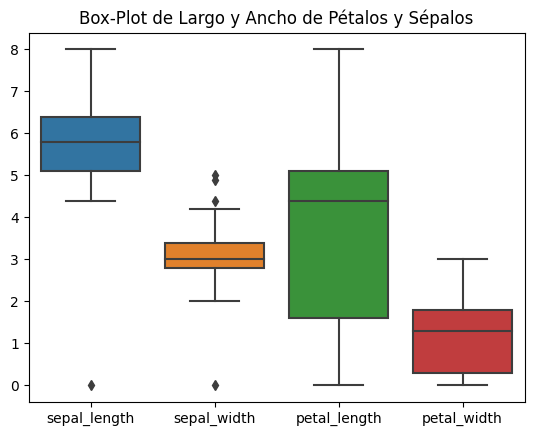

In [ ]:
# Reemplazar los valores NaN por 0
num_cols = [x for x in data.columns if x != "species"]

# Rellenamos de 0 valores nulos
data[num_cols] = data[num_cols].fillna(0)

# Crear un gráfico de box-plot utilizando seaborn
sns.boxplot(data=data[num_cols])

# Configurar el títlo del gráfico
plt.title('Box-Plot de Largo y Ancho de Pétalos y Sépalos')

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [ ]:
# Diccionario de valores
valid_range = {
     'sepal_length':(4.0, 7.0),
     'sepal_width':(2.0, 4.5),
     'petal_length':(1.0, 7.0),
     'petal_width':(0.1, 2.5)
}

# Agregar columna 'label' para identificar los valores fuera del rango válido
for feat, (min_val, max_val) in valid_range.items():
  data['label'] = data.apply(lambda row: 'out of range' if row[feat] < min_val or row[feat] > max_val else '', axis=1)

# Mostrar el DF con la columna 'label'
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,label
0,4.4,3.2,1.3,3.0,setosa,out of range
1,7.2,3.6,6.1,2.5,virginica,
2,6.3,3.3,6.0,2.5,virginica,
3,6.7,3.3,5.7,2.5,virginica,
4,6.3,3.4,5.6,2.4,virginica,


4. Realice un gráfico de *sepal_length* vs *petal_length* y otro de *sepal_width* vs *petal_width* categorizados por la etiqueta **label**. Concluya sus resultados.

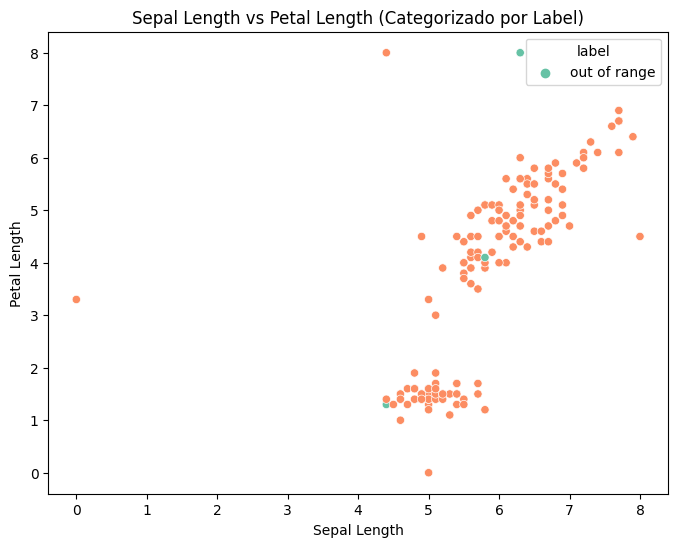

In [58]:
# Graficar sepal_length vs petal_length categorizado por label
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=data,
    x='sepal_length',
    y='petal_length',
    hue='label',
    palette='Set2'
)
plt.title('Sepal Length vs Petal Length (Categorizado por Label)')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

5. Filtre los datos válidos y realice un gráfico de *sepal_length* vs *petal_length* categorizados por la etiqueta **species**.

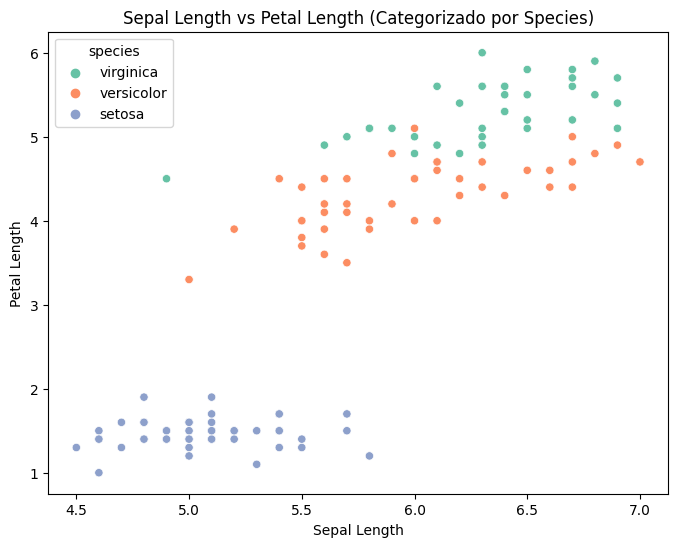

In [59]:
# Filtrar los datos válidos
filtered_data = data.copy().loc[lambda x: x['species']!='default']
for feat, (min_val, max_val) in valid_range.items():
  filtered_data = filtered_data[(filtered_data[feat] >= min_val) & (filtered_data[feat] <= max_val)]

# Graficar sepal_length vds petal_length categorizado por species
plt.figure(figsize=(8,6))
sns.scatterplot(data=filtered_data, x='sepal_length', y='petal_length', hue='species', palette='Set2')
plt.title('Sepal Length vs Petal Length (Categorizado por Species)')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()